# Linear Regression
The purpose of this notebook is to practice training (also known as fitting), interpreting and evaluating linear regression predictive models. 
We will use Python packages: pandas, matplotlib, statsmodels and scikit-learn.
Besides the material presented in this notebook, please also read this [notebook](http://www.dataschool.io/linear-regression-in-python/) that is very well written, contains many useful details and gives pointers to further reading. 

Training a linear regression model means estimating a set of weights (one weight per feature, plus an extra weight called the bias or the intercept) on a dataset called the training set. 

The model estimated is a linear model taking the form:

$target\_feature = w_0 + w_1 * feature_1 + w_2*feature_2 + ...+ w_n*feature_n $

The learned model can be used to predict the target feature for new examples where we know the descriptive features, but not the target feature. This is called the test example or the test data. In this notebook we will see the difference between evaluating the model on the training data and measuring the model error (in-sample error) versus evaluating the model on the test data and measuring that error (out-of-sample error). It is recommended that we always evaluate our model on a second data sample that was not used during training. This way we avoid overfitting or memorising the training data.

## Reading data

In [1]:
# Read into a dataframe a CSV dataset with 10 example offices 
# described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).

# Imports.
import pandas as pd
import matplotlib.pyplot as plt

# Allows plots to appear directly in the notebook.
%matplotlib inline

# Read csv file into a dataframe.
df = pd.read_csv('Offices.csv')
df

,ID,Size,Floor,BroadbandRate,EnergyRating,RentalPrice
0,1,500,4,8,C,320
1,2,550,7,50,A,380
2,3,620,9,7,A,400
3,4,630,5,24,B,390
4,5,665,8,100,C,385
5,6,700,4,8,B,410
6,7,770,10,7,B,480
7,8,880,12,50,A,600
8,9,920,14,8,C,570
9,10,1000,9,24,B,620


In [2]:
# Print the average RentalPrice in our dataset.
# We could use this as a very simple baseline prediction model.
# A smarter prediction model should at least improve on this baseline model.
df.RentalPrice.mean()

455.5

In [3]:
# Print the feature types in our dataset.
df.dtypes

ID                int64
Size              int64
Floor             int64
BroadbandRate     int64
EnergyRating     object
RentalPrice       int64
dtype: object

## Understanding data

In [4]:
# Look at correlations for all the continuous features.
df[['Size', 'Floor', 'BroadbandRate', 'RentalPrice']].corr()

,Size,Floor,BroadbandRate,RentalPrice
Size,1.000000,0.710863,-0.069117,0.971262
Floor,0.710863,1.000000,0.054897,0.766020
BroadbandRate,-0.069117,0.054897,1.000000,-0.068597
RentalPrice,0.971262,0.766020,-0.068597,1.000000


In [5]:
# The correlation for a given pair of features
df[['Size', 'RentalPrice']].corr().as_matrix()[0,1]

0.9712620608629573

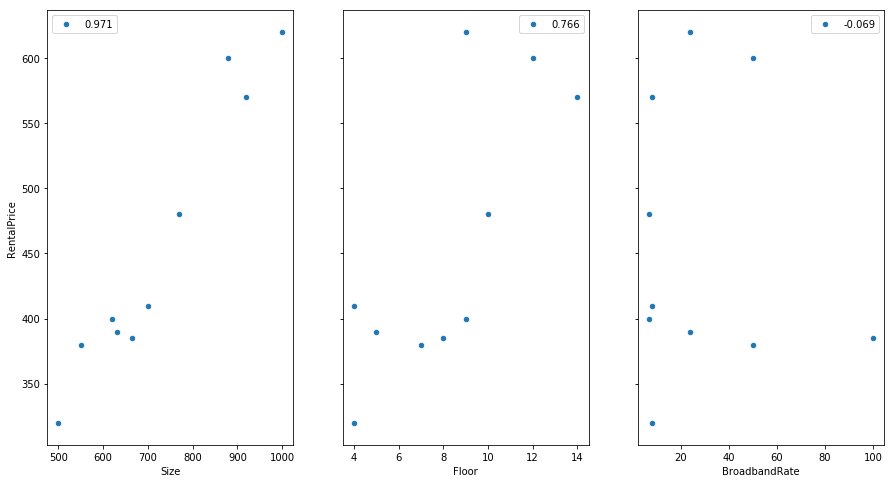

In [6]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Size', y='RentalPrice', label="%.3f" % df[['Size', 'RentalPrice']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter', x='Floor', y='RentalPrice', label="%.3f" % df[['Floor', 'RentalPrice']].corr().as_matrix()[0,1], ax=axs[1])
df.plot(kind='scatter', x='BroadbandRate', y='RentalPrice', label="%.3f" % df[['BroadbandRate', 'RentalPrice']].corr().as_matrix()[0,1], ax=axs[2])

# Linear regression with package <span style="color:red">statsmodels</span>

## Simple linear regression (one descriptive feature)
### Training a model

In [9]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm = sm.ols(formula="RentalPrice ~  Size", data=df).fit()

# Print the model weights/parameters
print(lm.params)

Intercept    6.46690
Size         0.62064
dtype: float64


### Testing the model
Using the trained model to predict the target feature RentalPrice, given the descriptive feature Size.

In [99]:
# The model learned is: RentalPrice = 6.46690 + 0.62064 * Size
# This means that for a unit increase in Size, we have a 0.62064 increase in RentalPrice.
# We can use the learned model to predict the RentalPrice for a new office Size.

# The Statsmodels predict() method expects a dataframe object.
# Create a new dataframe with a new test example. 
X_new = pd.DataFrame({'Size': [730]})
X_new.head()

,Size
0,730


In [100]:
# Predict the RentalPrice for a new office with Size 730, using the trained model. 
# The predicted value is 459.53.
lm.predict(X_new)

0    459.534161
dtype: float64

### Plotting the trained model

In [101]:
# We can plot the regression line that was estimated from our trainign set.
# First we use the trained model to predict prices for the min and max Size in our dataset.
X_minmax = pd.DataFrame({'Size': [df.Size.min(), df.Size.max()]})
X_minmax.head()


,Size
0,500
1,1000


In [102]:
# Make predictions for the min and max Size values and store them.
predictions = lm.predict(X_minmax)
predictions

0    316.786941
1    627.106983
dtype: float64

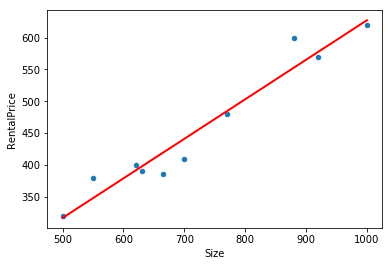

In [103]:
# First, plot the observed data
df.plot(kind='scatter', x='Size', y='RentalPrice')

# Next, plot the regression line, in red.
plt.plot(X_minmax, predictions, c='red', linewidth=2)

### Evaluating the quality of the model on the training data

In [104]:
# Print the summary of the trained model.
# The summary table includes several metrics for evaluating the goodness of fit of the model, 
# namely how well does this model approximate the relationship between descriptive and target features
# in the given dataset. For details on all these metrics please consult: 
# Chapter3, An Introduction to Statistical Learning: http://www-bcf.usc.edu/~gareth/ISL/

# We focus on the coeficient weight for each feature, column 'coef' in the table.
# Some values shown in the table describe the statistical significance of the weights via a t-test 
# (p-value, column 'P>|t|' and confidence interval, column '[95.0% Conf. Int.]').
# The t-test is a hypothesis test that checks if there is enough evidence in the data to support or reject the 
# null hypothesis.
# Null Hypothesis: There is no relationship between Size and RentalPrice (and thus the weight of feature Size is zero)
# Alternative Hypothesis: There is a relationship between Size and RentalPrice 
# (and thus the weight of feature Size is not equal to zero).
# We reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero.
# For the feature weight to be statistically significant at 95% confidence level, 
# the p-value has to be lower than 0.05. 
# We can see that the Intercept weight is not found to be statistically significant (p-value=0.875).
# The weight for feature Size is found to be statistically significant (p-value < 0.05, p-value=0.000).
# The p-value can guide us in selecting reliable features, 
# but is not an end in itself, we still need to evaluate the different choices we make 
# (e.g., different sets of features or new features we may create to capture non-linear relationships).
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            RentalPrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     133.2
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           2.88e-06
Time:                        13:53:40   Log-Likelihood:                -45.893
No. Observations:                  10   AIC:                             95.79
Df Residuals:                       8   BIC:                             96.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4669     39.805      0.162      0.8

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Multiple linear regression (using more than one feature)
### Training the model

In [105]:
# Train aka fit, a model using all continuous features.
lm = sm.ols(formula="RentalPrice ~  Size + Floor + BroadbandRate", data=df).fit()

# Print the weights learned for each feature.
print(lm.params)

Intercept        19.561559
Size              0.548740
Floor             4.963547
BroadbandRate    -0.062095
dtype: float64


### Evaluating the model on training data (p-values, R-squared)

In [106]:
# Print the table with feature weights, statistical confidence (p-values, confidence intervals) 
# and goodness of fit metrics (e.g., R-squared, Log-likelihood, AIB, BIC).
# Only feature Size is found to be statistically significant (p-value is smaller than 0.05, p-value=0).
# If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05.

# The most common metric to evaluate the overall fit of a linear model is the R-squared value. 
# R-squared is the reduction in error over the null model which simply predicts 
# the mean target feature value in the given dataset (e.g., in our dataset the average RentalPrice is 455.5, 
# the null model is RentalPrice = 455.5, which only has an intercept, all other weights are zero). 

# R-squared is also interpreted as the proportion of variance in the observed data 
# that is explained by the model. R-squared is between 0 and 1, and higher is better 
# because it means that more variance is explained by the model. 
# We can use R-squared to compare different models, e.g., the simple regression model with only feature Size has 
# R-squared of 0.943, while including the other continuous features leads to a model with higher R-squared of 0.955.
# This looks like a better model looking at the R-squared measure, but this could be due to 
# over-fitting the training data. We also need to make predictions on out-of-sample, also called test data,
# and then compare the results to make sure the model generalises to new data and does not only 
# capture insignificant details in the sample training data, a problem called over-fitting of the training data.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            RentalPrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     42.65
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           0.000193
Time:                        13:53:42   Log-Likelihood:                -44.718
No. Observations:                  10   AIC:                             97.44
Df Residuals:                       6   BIC:                             98.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.5616     43.645      0.448

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [107]:
df.min()

ID                 1
Size             500
Floor              4
BroadbandRate      7
EnergyRating       A
RentalPrice      320
dtype: object

In [108]:
df.max()

ID                 10
Size             1000
Floor              14
BroadbandRate     100
EnergyRating        C
RentalPrice       620
dtype: object

In [109]:
#Only keep numeric columns
df_cont = df[['Size', 'Floor', 'BroadbandRate', 'RentalPrice']]
df_cont

,Size,Floor,BroadbandRate,RentalPrice
0,500,4,8,320
1,550,7,50,380
2,620,9,7,400
3,630,5,24,390
4,665,8,100,385
5,700,4,8,410
6,770,10,7,480
7,880,12,50,600
8,920,14,8,570
9,1000,9,24,620


In [110]:
#Range normalise all columns
df_norm = (df_cont - df_cont.min()) / (df_cont.max() - df_cont.min())
df_norm

,Size,Floor,BroadbandRate,RentalPrice
0,0.00,0.0,0.010753,0.000000
1,0.10,0.3,0.462366,0.200000
2,0.24,0.5,0.000000,0.266667
3,0.26,0.1,0.182796,0.233333
4,0.33,0.4,1.000000,0.216667
5,0.40,0.0,0.010753,0.300000
6,0.54,0.6,0.000000,0.533333
7,0.76,0.8,0.462366,0.933333
8,0.84,1.0,0.010753,0.833333
9,1.00,0.5,0.182796,1.000000


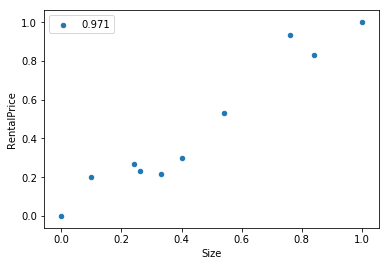

In [111]:
df_norm.plot(kind='scatter', x='Size', y='RentalPrice', label="%.3f" % df_norm[['Size', 'RentalPrice']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='Floor', y='RentalPrice', label="%.3f" % df[['Floor', 'RentalPrice']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='BroadbandRate', y='RentalPrice', label="%.3f" % df[['BroadbandRate', 'RentalPrice']].corr().as_matrix()[0,1])

In [112]:
lm_df_norm = sm.ols(formula="RentalPrice ~  Size", data=df_norm).fit()
print(lm_df_norm.params)

Intercept   -0.01071
Size         1.03440
dtype: float64


In [113]:
lm_df_norm = sm.ols(formula="RentalPrice ~  Size + Floor + BroadbandRate", data=df_norm).fit()
print(lm_df_norm.params)

Intercept       -0.022163
Size             0.914566
Floor            0.165452
BroadbandRate   -0.019249
dtype: float64


In [114]:
print(lm_df_norm.summary())

                            OLS Regression Results                            
Dep. Variable:            RentalPrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     42.65
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           0.000193
Time:                        13:53:46   Log-Likelihood:                 12.319
No. Observations:                  10   AIC:                            -16.64
Df Residuals:                       6   BIC:                            -15.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0222      0.057     -0.391

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [115]:
# Trying standardisation of features, instead of range normalisation.
df_st = (df_cont - df_cont.mean()) / df_cont.std()
df_st

,Size,Floor,BroadbandRate,RentalPrice
0,-1.354055,-1.262528,-0.679885,-1.284679
1,-1.051134,-0.360722,0.706288,-0.715818
2,-0.627046,0.240481,-0.712889,-0.526197
3,-0.566462,-0.961926,-0.151819,-0.621007
4,-0.354417,-0.060120,2.356494,-0.668412
5,-0.142373,-1.262528,-0.679885,-0.431387
6,0.281716,0.541083,-0.712889,0.232285
7,0.948141,1.142287,0.706288,1.370008
8,1.190478,1.743490,-0.679885,1.085578
9,1.675151,0.240481,-0.151819,1.559629


In [116]:
lm_df_st = sm.ols(formula="RentalPrice ~  Size + Floor + BroadbandRate", data=df_st).fit()
print(lm_df_st.summary())

                            OLS Regression Results                            
Dep. Variable:            RentalPrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     42.65
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           0.000193
Time:                        13:53:49   Log-Likelihood:                 1.8662
No. Observations:                  10   AIC:                             4.268
Df Residuals:                       6   BIC:                             5.478
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.551e-17      0.082  -6.77e-16

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### Dealing with categorical features

In [117]:
# Train a model using only the categorical feature EnergyRating
# Statsmodels can do this directly using the C(EnergyRating) - 1, that tells the fit() method 
# that EnergyRating is a categorical feature. It internally turns it into binary features.
# The -1 above keeps all the levels of the feature in the model. 
lm_categ = sm.ols(formula="RentalPrice ~ C(EnergyRating)", data=df).fit()
print(lm_categ.summary())

                            OLS Regression Results                            
Dep. Variable:            RentalPrice   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.230
Method:                 Least Squares   F-statistic:                    0.1598
Date:                Thu, 08 Mar 2018   Prob (F-statistic):              0.855
Time:                        13:54:06   Log-Likelihood:                -60.024
No. Observations:                  10   AIC:                             126.0
Df Residuals:                       7   BIC:                             127.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              460.0000 

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [118]:
# Train a model with all features
lm_categ = sm.ols(formula="RentalPrice ~ Size +  Floor + BroadbandRate + C(EnergyRating)", data=df).fit()
print(lm_categ.summary())

                            OLS Regression Results                            
Dep. Variable:            RentalPrice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     45.67
Date:                Thu, 08 Mar 2018   Prob (F-statistic):            0.00127
Time:                        13:54:07   Log-Likelihood:                -39.937
No. Observations:                  10   AIC:                             91.87
Df Residuals:                       4   BIC:                             93.69
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               25.0809 

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [119]:
# Explicitly turn the categorical features to continuous binary features.
# This is helpful when we want to transform the data down the line, e.g., normalise features.
# First method to turn categorical to continuous.
df_ER_A = (df.EnergyRating=='A') * 1.0
df_ER_B = (df.EnergyRating=='B') * 1.0
df_ER_C = (df.EnergyRating=='C') * 1.0

df_ER = pd.DataFrame({'ER_A': df_ER_A,
                     'ER_B': df_ER_B,
                     'ER_C':df_ER_C})
df_ER

,ER_A,ER_B,ER_C
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,1.0,0.0,0.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [120]:
# Add the new columns to the data frame
df_new = pd.concat([df_cont, df_ER], axis = 1)
df_new

,Size,Floor,BroadbandRate,RentalPrice,ER_A,ER_B,ER_C
0,500,4,8,320,0.0,0.0,1.0
1,550,7,50,380,1.0,0.0,0.0
2,620,9,7,400,1.0,0.0,0.0
3,630,5,24,390,0.0,1.0,0.0
4,665,8,100,385,0.0,0.0,1.0
5,700,4,8,410,0.0,1.0,0.0
6,770,10,7,480,0.0,1.0,0.0
7,880,12,50,600,1.0,0.0,0.0
8,920,14,8,570,0.0,0.0,1.0
9,1000,9,24,620,0.0,1.0,0.0


In [121]:
#Train a model with all the features
lm_df_new = sm.ols(formula="RentalPrice ~  Size + Floor + BroadbandRate + ER_A + ER_B + ER_C", data=df_new).fit()
print(lm_df_new.summary())

                            OLS Regression Results                            
Dep. Variable:            RentalPrice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     45.67
Date:                Thu, 08 Mar 2018   Prob (F-statistic):            0.00127
Time:                        13:54:08   Log-Likelihood:                -39.937
No. Observations:                  10   AIC:                             91.87
Df Residuals:                       4   BIC:                             93.69
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3519     27.777     -0.121

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [122]:
lm_df_new.predict(df_new)

0    303.569952
1    372.308160
2    423.059341
3    380.616241
4    397.568319
5    427.740089
6    472.993660
7    584.632499
8    573.861730
9    618.650010
dtype: float64

In [123]:
# Second method to tranform EnergyRating to binary continuous features, using the get_dummies() method
energyrating_dummies = pd.get_dummies(df.EnergyRating, prefix='EnergyRating')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df_new_dummies = pd.concat([df_cont, energyrating_dummies], axis=1)
df_new_dummies

,Size,Floor,BroadbandRate,RentalPrice,EnergyRating_A,EnergyRating_B,EnergyRating_C
0,500,4,8,320,0,0,1
1,550,7,50,380,1,0,0
2,620,9,7,400,1,0,0
3,630,5,24,390,0,1,0
4,665,8,100,385,0,0,1
5,700,4,8,410,0,1,0
6,770,10,7,480,0,1,0
7,880,12,50,600,1,0,0
8,920,14,8,570,0,0,1
9,1000,9,24,620,0,1,0


In [124]:
#Standardise all features (instead of range normalisation, we try the second type of normalisation here)
df_new_st = (df_new - df_new.mean()) / df_new.std()
df_new_st

,Size,Floor,BroadbandRate,RentalPrice,ER_A,ER_B,ER_C
0,-1.354055,-1.262528,-0.679885,-1.284679,-0.621059,-0.774597,1.449138
1,-1.051134,-0.360722,0.706288,-0.715818,1.449138,-0.774597,-0.621059
2,-0.627046,0.240481,-0.712889,-0.526197,1.449138,-0.774597,-0.621059
3,-0.566462,-0.961926,-0.151819,-0.621007,-0.621059,1.161895,-0.621059
4,-0.354417,-0.060120,2.356494,-0.668412,-0.621059,-0.774597,1.449138
5,-0.142373,-1.262528,-0.679885,-0.431387,-0.621059,1.161895,-0.621059
6,0.281716,0.541083,-0.712889,0.232285,-0.621059,1.161895,-0.621059
7,0.948141,1.142287,0.706288,1.370008,1.449138,-0.774597,-0.621059
8,1.190478,1.743490,-0.679885,1.085578,-0.621059,-0.774597,1.449138
9,1.675151,0.240481,-0.151819,1.559629,-0.621059,1.161895,-0.621059


In [125]:
lm_df_new_st = sm.ols(formula="RentalPrice ~  Size + Floor + BroadbandRate + ER_A + ER_B + ER_C", data=df_new_st).fit()
print(lm_df_new_st.summary())

                            OLS Regression Results                            
Dep. Variable:            RentalPrice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     45.67
Date:                Thu, 08 Mar 2018   Prob (F-statistic):            0.00127
Time:                        13:54:10   Log-Likelihood:                 6.6474
No. Observations:                  10   AIC:                            -1.295
Df Residuals:                       4   BIC:                            0.5206
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.551e-17      0.062  -8.92e-16

/Users/georgianaifrim/anaconda/envs/comp47350/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
